Epoch 1/20
352/352 [==============================] - 7s 16ms/step - loss: 1.6542 - acc: 0.3963 - val_loss: 1.3094 - val_acc: 0.5426
Epoch 2/20
352/352 [==============================] - 5s 14ms/step - loss: 1.2221 - acc: 0.5643 - val_loss: 0.9898 - val_acc: 0.6528
Epoch 3/20
352/352 [==============================] - 5s 15ms/step - loss: 1.0294 - acc: 0.6360 - val_loss: 0.9155 - val_acc: 0.6838
Epoch 4/20
352/352 [==============================] - 5s 14ms/step - loss: 0.9100 - acc: 0.6775 - val_loss: 0.8122 - val_acc: 0.7224
Epoch 5/20
352/352 [==============================] - 5s 14ms/step - loss: 0.8171 - acc: 0.7141 - val_loss: 0.7678 - val_acc: 0.7340
Epoch 6/20
352/352 [==============================] - 5s 15ms/step - loss: 0.7414 - acc: 0.7387 - val_loss: 0.6882 - val_acc: 0.7618
Epoch 7/20
352/352 [==============================] - 5s 14ms/step - loss: 0.6974 - acc: 0.7536 - val_loss: 0.6766 - val_acc: 0.7712
Epoch 8/20
352/352 [==============================] - 5s 15ms/step - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


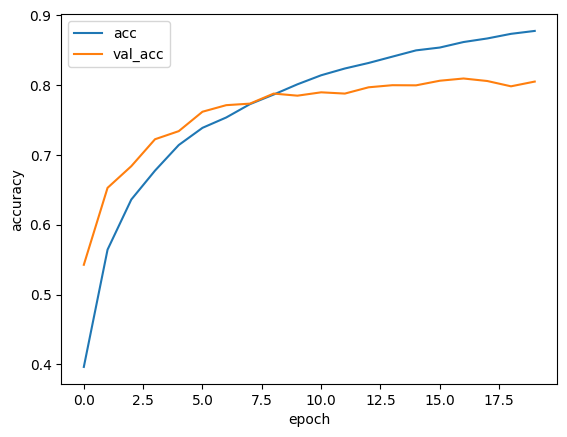

313/313 [==============================] - 1s 3ms/step - loss: 0.6607 - acc: 0.7875


In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.models import load_model

import matplotlib.pyplot as plt
%matplotlib inline


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

model = Sequential()

# Convolutional Block (Conv-Conv-Pool-Dropout)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block (Conv-Conv-Pool-Dropout)
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Classifying
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split=0.1)

model.save('CNN_CIFAR10.h5')
model = load_model('CNN_CIFAR10.h5')

plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels)



In [ ]:
import numpy as np

# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)


313/313 [==============================] - 1s 2ms/step
[[2.0801949e-07 3.0461223e-07 4.3033432e-07 ... 2.2731426e-06
  1.5394391e-05 1.1320782e-06]
 [6.4475825e-09 1.0168170e-04 2.6754514e-20 ... 3.7224453e-25
  9.9989831e-01 1.8176809e-09]
 [1.9862780e-02 4.9205966e-02 1.1803864e-07 ... 6.7404886e-07
  9.1243100e-01 1.8439798e-02]
 ...
 [3.6038669e-11 5.0974374e-16 2.2441985e-04 ... 2.6677699e-06
  9.0890941e-11 4.2177172e-13]
 [3.1429077e-03 9.9358833e-01 7.6341448e-06 ... 3.4109384e-04
  1.9743211e-04 1.0466836e-03]
 [6.1691542e-12 6.0771162e-15 7.7528924e-08 ... 9.9811268e-01
  5.5659217e-15 1.7241081e-14]]
[3 8 8 ... 5 1 7]


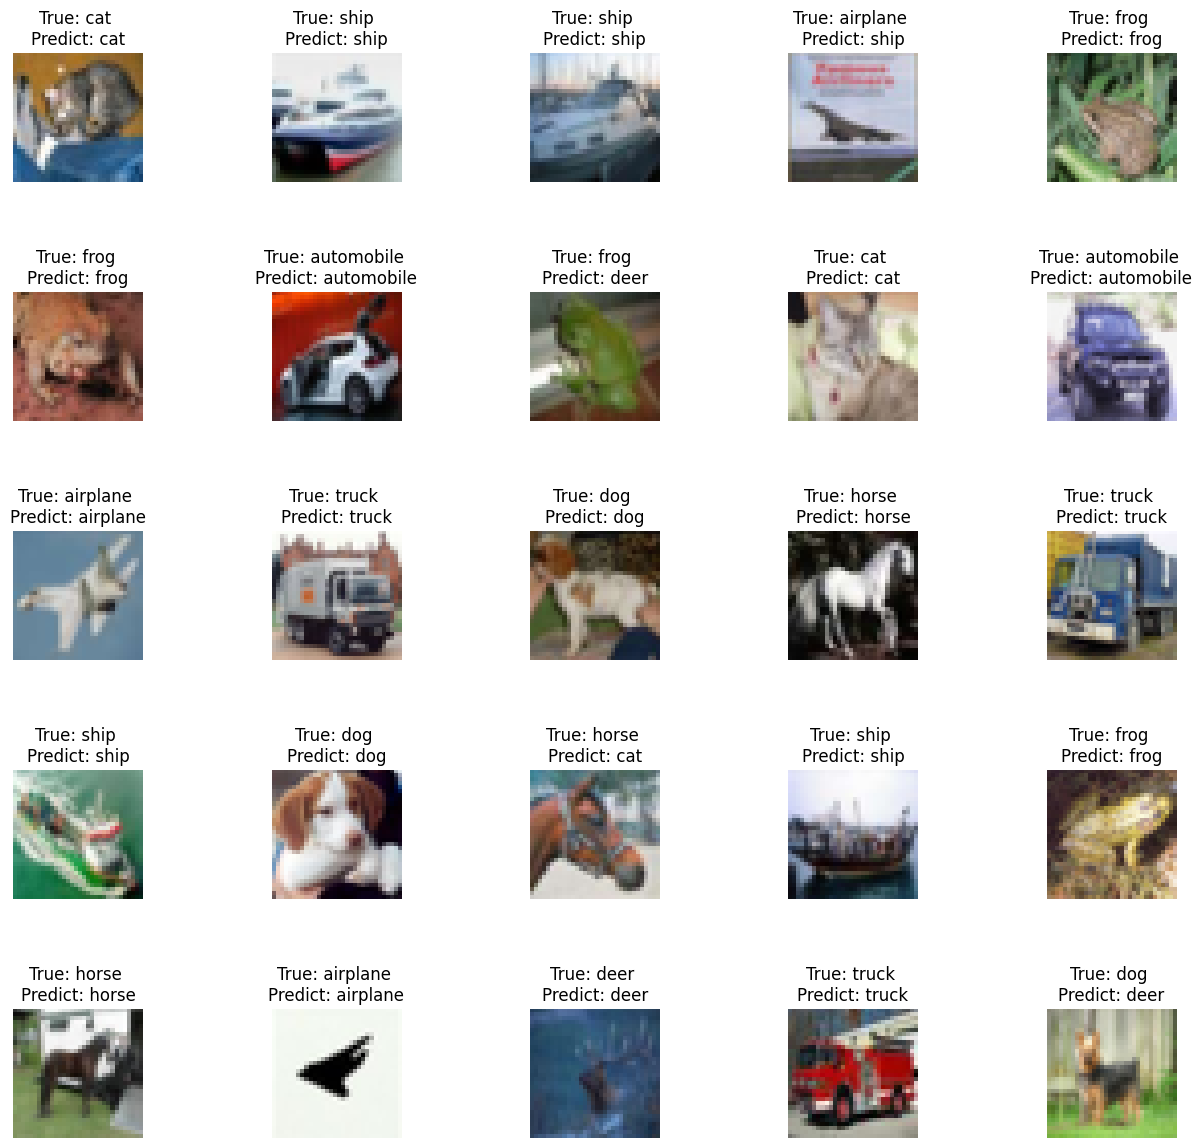

In [ ]:
# Plotting the Actual vs. Predicted results
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)
